In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re, string, nltk, requests, bs4
import re, pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
from collections import Counter
import text_mining_utils as tm
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.feature_selection import f_classif
from sklearn.svm import SVC


#import wordcloud, nltk
import nltk
from collections import Counter
import text_mining_utils as tm
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
#import wordcloud
%matplotlib inline
import warnings


In [30]:
def retrieve_text_data(url, elems):
    page = requests.get(url)
    page_data = page.text
    soup = bs4.BeautifulSoup(page_data,'html.parser').body
    data = []
    for e in elems:
        data += soup.find_all(e)
    data=[el.get_text() for el in data]
    return ''.join(data)

premierleague_urls = [  
    "https://en.wikipedia.org/wiki/Premier_League",
    "https://en.wikipedia.org/wiki/1992%E2%80%9393_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1993%E2%80%9394_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1994%E2%80%9395_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1995%E2%80%9396_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1996%E2%80%9397_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1997%E2%80%9398_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1998%E2%80%9399_FA_Premier_League",
    "https://en.wikipedia.org/wiki/1999%E2%80%932000_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2000%E2%80%9301_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2001%E2%80%9302_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2002%E2%80%9303_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2003%E2%80%9304_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2004%E2%80%9305_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2005%E2%80%9306_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2006%E2%80%9307_FA_Premier_League",
    "https://en.wikipedia.org/wiki/2007%E2%80%9308_Premier_League",
    "https://en.wikipedia.org/wiki/2008%E2%80%9309_Premier_League",
    "https://en.wikipedia.org/wiki/2009%E2%80%9310_Premier_League",
    "https://en.wikipedia.org/wiki/2010%E2%80%9311_Premier_League",
    "https://en.wikipedia.org/wiki/2011%E2%80%9312_Premier_League",
    "https://en.wikipedia.org/wiki/2012%E2%80%9313_Premier_League",
    "https://en.wikipedia.org/wiki/2013%E2%80%9314_Premier_League"
    "https://en.wikipedia.org/wiki/2014%E2%80%9315_Premier_League",
    "https://en.wikipedia.org/wiki/2015%E2%80%9316_Premier_League",
    "https://en.wikipedia.org/wiki/2016%E2%80%9317_Premier_League",
    "https://en.wikipedia.org/wiki/2017%E2%80%9318_Premier_League",
    "https://en.wikipedia.org/wiki/2018%E2%80%9319_Premier_League",
    "https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League",
    "https://en.wikipedia.org/wiki/2020%E2%80%9321_Premier_League",
    "https://en.wikipedia.org/wiki/2021%E2%80%9322_Premier_League"

]

xbox_urls = [
    
    "https://www.purexbox.com/features/these-games-are-coming-to-xbox-next-week-august-22-26",
    "https://www.purexbox.com/news/2022/08/whos-your-daddy-is-still-one-of-xboxs-most-popular-games",
    "https://www.purexbox.com/news/2022/08/pick-one-whats-the-best-racing-series-in-xbox-history",
    "https://www.purexbox.com/news/2022/08/id-software-says-its-hard-at-work-on-its-next-big-game",
    "https://www.purexbox.com/news/2022/08/wait-did-xbox-pay-usd600k-for-cooking-simulator-on-game-pass",
    "https://www.purexbox.com/news/2022/08/redfalls-expansive-open-world-is-arkanes-largest-to-date",
    "https://www.purexbox.com/features/reaction-death-strandings-reception-makes-us-very-excited-for-kojima-plus-xbox",
    "https://www.purexbox.com/news/2022/08/call-of-duty-is-going-full-nostalgia-with-latest-series-update",
     "https://www.purexbox.com/news/2022/08/two-more-games-added-to-september-2022s-xbox-game-pass-lineup",
    "https://www.purexbox.com/news/2022/08/a-plague-tale-requiem-gameplay-overview-lands-ahead-of-xbox-game-pass-launch",
    "https://www.purexbox.com/news/2022/08/ghostbusters-returns-to-xbox-with-a-new-multiplayer-game-this-october",
    "https://www.purexbox.com/news/2022/08/deals-all-40plus-backwards-compatible-games-in-this-weeks-xbox-sales-august-16-23",
    "https://www.purexbox.com/news/2022/08/dead-island-2-xbox-listing-now-live-with-potential-february-2023-release-date",
     "https://www.purexbox.com/news/2022/08/roundup-heres-what-the-critics-think-of-jrpg-soul-hackers-2",
    "https://www.purexbox.com/news/2022/08/fallout-tv-show-images-look-incredibly-faithful-to-bethesdas-series",
    "https://www.purexbox.com/features/soapbox-we-need-more-light-hearted-spin-offs-like-immortals-fenyx-rising",
    "https://www.purexbox.com/news/2022/08/rumour-xbox-could-be-teasing-death-stranding-for-pc-game-pass",
    "https://www.purexbox.com/news/2022/08/xbox-game-pass-shooter-high-on-life-confirmed-for-gamescom-showcase",
    "https://www.purexbox.com/news/2022/08/hideo-kojima-teases-work-in-progress-trailer-for-upcoming-project",
    "https://www.purexbox.com/features/talking-point-whats-your-2022-game-of-the-year-so-fare",
    "https://www.purexbox.com/news/2022/08/call-of-duty-modern-warfare-2-campaign-gets-new-release-date",
    "https://www.purexbox.com/news/2022/08/crash-bandicoot-developer-appears-to-be-working-on-new-game",
    "https://www.purexbox.com/news/2022/08/apple-arcade-exclusive-little-orpheus-is-coming-to-xbox-next-month",
    "https://www.purexbox.com/news/2022/08/gorgeous-cinematic-adventure-planet-of-lana-hits-xbox-game-pass-day-one",
    "https://www.purexbox.com/news/2022/08/wild-west-shooter-evil-west-has-been-delayed-until-november-2022",
    "https://www.purexbox.com/news/2022/08/these-8-games-are-coming-to-xbox-game-pass-august-16-30",
    "https://www.purexbox.com/reviews/xbox-series-x/thymesia",
    "https://www.purexbox.com/news/2022/08/roundup-heres-what-the-critics-think-of-next-gen-rpg-thymesia",
    "https://www.purexbox.com/news/2022/08/rumour-immortals-fenyx-rising-spotted-for-xbox-game-pass",
    "https://www.purexbox.com/news/2022/08/grounded-is-receiving-major-new-shared-worlds-feature"
   

   


]

playstation_urls = [  
    "https://blog.playstation.com/2022/08/19/share-of-the-week-animals-2/",
    "https://blog.playstation.com/2022/08/19/details-revealed-for-kenas-free-anniversary-update-out-september-27/",
    "https://blog.playstation.com/2022/08/19/how-ghost-pattern-built-the-story-driven-world-of-wayward-strand/",
    "https://blog.playstation.com/2022/08/03/meet-your-maker-revealed-a-brutal-new-take-on-building-and-raiding/",
    "https://blog.playstation.com/2022/08/09/playground-and-duos-mode-revealed-for-rumbleverse-launch-out-august-11/",
    "https://blog.playstation.com/2022/08/10/playstation-plus-game-catalog-lineup-for-august-yakuza-0-trials-of-mana-dead-by-daylight-bugsnax/",
    "https://blog.playstation.com/2022/08/10/how-guerrilla-created-vegas-in-horizon-forbidden-west/",
    "https://blog.playstation.com/2022/08/18/get-the-lowdown-on-fallout-76s-expeditions-before-entering-the-pitt/",
    "https://blog.playstation.com/2022/08/18/call-of-duty-vanguard-and-call-of-duty-warzone-last-stand-launches-august-24/",
    "https://blog.playstation.com/2022/08/18/cursed-to-golf-is-out-today-on-ps5-and-ps4/",
    "https://blog.playstation.com/2022/08/18/meet-the-four-legged-cast-of-thems-fightin-herds-out-october-18/",
    "https://blog.playstation.com/2022/08/18/blazing-chrome-creator-returns-with-vengeful-guardian-moonrider/",
    "https://blog.playstation.com/2022/08/18/only-the-strong-survive-how-amicia-and-hugos-abilities-will-change-in-a-plague-tale-requiem/",
    "https://blog.playstation.com/2022/08/17/blue-hair-and-pronouns-in-i-was-a-teenage-exocolonist-out-august-25/",
    "https://blog.playstation.com/2022/08/16/call-of-duty-modern-warfare-ii-campaign-early-access-mp-beta-details/",
    "https://blog.playstation.com/2022/08/16/a-deeper-look-at-the-gameplay-and-soundtrack-of-serial-cleaners/",
    "https://blog.playstation.com/2022/08/16/goku-powers-up-fortnite-x-dragon-ball-live-today/",
    "https://blog.playstation.com/2022/08/15/story-details-you-need-to-know-before-playing-god-of-war-ragnarok/",
    "https://blog.playstation.com/2022/08/12/spongebob-squarepants-the-cosmic-shake-announced/",
    "https://blog.playstation.com/2022/08/12/alone-in-the-dark-returns/",
    "https://blog.playstation.com/2022/08/12/marvels-spider-man-remastered-swings-onto-pc-today/",
    "https://blog.playstation.com/2022/08/11/prepare-for-rollerdrome-with-dev-combat-tips-out-august-16/",
    "https://blog.playstation.com/2022/08/08/six-of-the-wildest-games-we-played-at-dreamscom-22/"
    "https://blog.playstation.com/2022/08/08/dusk-diver-2s-high-octane-combat-explained-out-on-ps5-ps4-august-30/",
    "https://blog.playstation.com/2022/08/07/how-capcom-designed-kimberly-and-juri-for-street-fighter-6/",
    "https://blog.playstation.com/2022/08/02/how-rollerdromes-composer-created-the-sound-of-2030/",
    "https://blog.playstation.com/2022/07/28/goat-simulator-3-releases-november-17-devs-discuss-naming-the-game/",
    "https://blog.playstation.com/2022/07/28/introducing-backbone-one-playstation-edition-an-officially-licensed-controller-for-playstation/",
    "https://blog.playstation.com/2022/07/27/the-realism-of-fifa-23s-new-motion-capture-technology/",
    "https://blog.playstation.com/2022/07/27/gran-turismo-7-july-update-1-19-delivers-three-new-vehicles-to-legend-cars-and-brand-central/",
    "https://blog.playstation.com/2022/07/26/early-look-at-the-user-experience-for-playstation-vr2/"

]



In [16]:
playstation_docs = [retrieve_text_data(url, ['h1','p']) for url
            in playstation_urls]
playstation_docs
print(len(playstation_docs))

30


In [17]:
premierleague_docs = [retrieve_text_data(url, ['h1','p']) for url
            in premierleague_urls]
premierleague_docs
print(len(premierleague_docs))

30


In [31]:
xbox_docs = [retrieve_text_data(url, ['h1','p']) for url
            in xbox_urls]
xbox_docs
print(len(xbox_docs))

30


In [32]:
all_docs = premierleague_docs + playstation_docs + xbox_docs
all_labels = (['premierleague'] * len(premierleague_docs) + 
              ['playstation'] * len(playstation_docs) +
              ['xbox'] * len(xbox_docs))
all_docs

['Premier League\nThe Premier League (legal name: The Football Association Premier League Limited), is the top level of the men\'s English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches (playing all 19 other teams both home and away).[1] Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures.[2]\nThe competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights sale to Sky.[3] From 2019 to 2020, the league\'s accumulated television rights deals were worth around £3.1\xa0billion a year, with Sky and BT Group securing the domestic rights to broadcast 128 and 32 games respectively.[4][5] The Premier 

In [33]:
def build_corpus(docs,labels):
    corpus = np.array(docs)
    corpus = pd.DataFrame({'Article': corpus, 'Class': labels})
    corpus + corpus.sample(len(corpus))
    return corpus

corpus = build_corpus(all_docs, all_labels)
corpus

,Article,Class
0,Premier League\nThe Premier League (legal name...,premierleague
1,1992–93 FA Premier League\nThe 1992–93 FA Prem...,premierleague
2,1993–94 FA Premier League\nThe 1993–94 FA Prem...,premierleague
3,1994–95 FA Premier League\nThe 1994–95 FA Prem...,premierleague
4,1995–96 FA Premier League\nThe 1995–96 FA Prem...,premierleague
...,...,...
85,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox
86,Thymesia Review (Xbox Series X|S)GuestLogin or...,xbox
87,Roundup: Here's What The Critics Think Of Next...,xbox
88,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox


In [34]:
len(all_docs), all_labels

(90,
 ['premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'premierleague',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',
  'playstation',


In [35]:
corpus.to_csv('corpus.csv',
              columns=['Article', 'Class'], index=False)

In [37]:
def build_corpus(docs):
    corpus = np.array(docs)
    corpus = pd.DataFrame({'Article': corpus})
    corpus + corpus.sample(len(corpus))
    return corpus

corpus = build_corpus(playstation_docs)
corpus

,Article
0,Share of the Week: Animals\n\t\t\t\t\t\t\t\t\t...
1,Details revealed for Kena’s free Anniversary U...
2,How Ghost Pattern built the story-driven world...
3,"Meet Your Maker revealed, a brutal new take on..."
4,Playground and Duos mode revealed for Rumbleve...
5,PlayStation Plus Game Catalog lineup for Augus...
6,How Guerrilla created Vegas in Horizon Forbidd...
7,Get the lowdown on Fallout 76’s Expeditions be...
8,Call of Duty: Vanguard and Call of Duty: Warzo...
9,Cursed to Golf is out today on PS5 and PS4\n\t...


In [38]:
import re, pandas as pd, numpy as np, matplotlib.pyplot as plt
import nltk
from collections import Counter
warnings.filterwarnings('ignore')
%matplotlib inline

def build_count_matrix(corpus):
    tokenised_corpus = [nltk.word_tokenize(doc) for doc in corpus]
    freq_dists = []
    for doc in tokenised_corpus:
        token_count = {}
        for token in doc:
            if token in token_count.keys():
                token_count[token]+=1
            else:
                 token_count[token] = 1
        freq_dists.append(pd.Series(token_count))
    matrix = pd.DataFrame(freq_dists)
    matrix = matrix.fillna(0)
    return matrix

In [42]:
articles = list(corpus.Article)
baseline_count_matrix = build_count_matrix(articles)
baseline_count_matrix

,Share,of,the,Week,:,Animals,Furry,friends,far,and,...,120Hz,rate.PS,begin,ongoing,dramatic,innovation,Design,specification,notice,218
0,4.0,5.0,11.0,2.0,5.0,1.0,1.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,17.0,20.0,0.0,5.0,0.0,0.0,0.0,0.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,29.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,23.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,22.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,16.0,21.0,0.0,3.0,0.0,0.0,1.0,0.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,58.0,100.0,0.0,2.0,0.0,0.0,0.0,1.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,15.0,33.0,0.0,3.0,0.0,0.0,2.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,23.0,52.0,0.0,10.0,0.0,0.0,0.0,0.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,32.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, precision_score, accuracy_score
def crossvalidate_model(clf, X, y, print_=True):
    scoring = ['accuracy', 'precision_macro', 'recall_macro']
    scores = cross_validate(dt_clf, X, y, scoring=scoring)
    if(print_):
         for key in scores.keys():
            print('%s: %0.2f, with a standard deviation: %0.2f' %(key,
                scores[key].mean(), scores[key].std()))
    return scores



In [48]:
data=pd.read_csv('corpus.csv')
data

,Article,Class
0,Premier League\nThe Premier League (legal name...,premierleague
1,1992–93 FA Premier League\nThe 1992–93 FA Prem...,premierleague
2,1993–94 FA Premier League\nThe 1993–94 FA Prem...,premierleague
3,1994–95 FA Premier League\nThe 1994–95 FA Prem...,premierleague
4,1995–96 FA Premier League\nThe 1995–96 FA Prem...,premierleague
...,...,...
85,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox
86,Thymesia Review (Xbox Series X|S)GuestLogin or...,xbox
87,Roundup: Here's What The Critics Think Of Next...,xbox
88,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox


In [49]:
premierleague_docs=list(data.Article[data.Class=='premierleague'])
premierleague_data=''.join(premierleague_docs)
print(premierleague_data)

playstation_docs=list(data.Article[data.Class=='playstation'])
playstation_data=''.join(playstation_docs)
print(playstation_data)

xbox_docs=list(data.Article[data.Class=='xbox'])
xbox_data=''.join(xbox_docs)
print(xbox_data)

Premier League
The Premier League (legal name: The Football Association Premier League Limited), is the top level of the men's English football league system. Contested by 20 clubs, it operates on a system of promotion and relegation with the English Football League (EFL). Seasons typically run from August to May with each team playing 38 matches (playing all 19 other teams both home and away).[1] Most games are played on Saturday and Sunday afternoons, with occasional weekday evening fixtures.[2]
The competition was founded as the FA Premier League on 20 February 1992 following the decision of clubs in the Football League First Division to break away from the Football League, founded in 1888, and take advantage of a lucrative television rights sale to Sky.[3] From 2019 to 2020, the league's accumulated television rights deals were worth around £3.1 billion a year, with Sky and BT Group securing the domestic rights to broadcast 128 and 32 games respectively.[4][5] The Premier League is

In [50]:
def normalise_POS_counts(tagged_docs, pos):
    counts=[]
    for d in tagged_docs:
        count = 0
        for pair in d:
            if pair[1] ==pos:
                count += 1
        counts.append(count)
    lengths = [len(d) for d in tagged_docs]
    return [counts/length for count, length in zip(counts, length)]

In [51]:
def normalise_POS_counts(tagged_docs, pos):
    counts=[]
    for d in tagged_docs:
        count = 0
        for pair in d:
            if pair[1] ==pos:
                count += 1
        counts.append(count)
    lengths = [len(d) for d in tagged_docs]
    return [counts/length for count, length in zip(counts, length)]

def plot_POS_freq(docs, pos, categories):
    tagged_docs = [nltk.pos_tag(nltk.word_tokenize(doc))for doc in docs]
    normalised_counts= normalise_POS_counts(tagged_docs, pos)
    plt.bar(np.arange(len(docs)), normalised_counts, align='center')
    plt.xticks(np.arrange(len(docs)). categories, rotation=40)
    plt.xlabel('categories')
    plt.ylabel(pos +" frequency")
    plt.title('Frequency distribution of ' +pos)

In [55]:
texts = [premierleague_docs, playstation_docs, xbox_docs]
## visualise the frequency of CC part of speech (conjunctions) 
## across the 3 categories
plot_POS_freq(texts, '', ['premierleague', 'playstation', 'xbox'])

TypeError: expected string or bytes-like object

In [53]:
premierleague_text = ' '.join(data.Article[data.Class == 'premierleague'])
playstation_text = ' '.join(data.Article[data.Class == 'playstation'])
xbox_text = ' '.join(data.Article[data.Class == 'xbox'])

In [58]:
texts = [premierleague_text, xbox_text, playstation_text]
## visualise the frequency of CC part of speech (conjunctions) 
plot_POS_freq(texts, 'CC', ['premierleague', 'playstation', 'xbox'])

NameError: name 'length' is not defined

In [60]:
def build_count_matrix(corpus):
 ## tokenise the corpus first
    tokenised_corpus = [nltk.word_tokenize(doc) for doc in corpus]
 ## a list of dictionaries aka frequency distributions
    freq_dists = []
    for doc in tokenised_corpus:
        token_count = {}
        for token in doc:
            if token in token_count.keys():
                token_count[token] += 1
            else: 
                token_count[token] = 1
        ## create a pd series from the dictionary generated for each doc
        ## and append it to the list
        freq_dists.append(pd.Series(token_count))
    ## once we have series for each doc, we use the list to build the 
    ## data frame and then replace the nans with 0, and return it
    matrix = pd.DataFrame(freq_dists)
    matrix = matrix.fillna(0)
    return matrix



In [61]:
def normalise_POS_counts(tagged_docs, pos):
    counts=[]
    for d in tagged_docs:
        count = 0
        for pair in d:
            if pair[1] ==pos:
                count += 1
        counts.append(count)
    lengths = [len(d) for d in tagged_docs]
    return [counts/length for count, length in zip(counts, length)]

def plot_POS_freq(docs, pos, categories):
    tagged_docs = [nltk.pos_tag(nltk.word_tokenize(doc))for doc in docs]
    normalised_counts= normalise_POS_counts(tagged_docs, pos)
    plt.bar(np.arange(len(docs)), normalised_counts, align='center')
    plt.xticks(np.arrange(len(docs)). categories, rotation=40)
    plt.xlabel('categories')
    plt.ylabel(pos +" frequency")
    plt.title('Frequency distribution of ' +pos)

In [62]:
articles = list(data.Article)
## build the matrix using the articles
baseline_count_matrix = build_count_matrix(articles)
baseline_count_matrix

,Premier,League,The,(,legal,name,:,Football,Association,Limited,...,Adaptation,Writer,Dynamic,Background,Hazy,Included,18News,Approached,'Another,AcquisitionPopular
0,175.0,237.0,117.0,78.0,1.0,3.0,13.0,31.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,21.0,22.0,8.0,0.0,0.0,0.0,10.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,10.0,4.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,6.0,5.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,16.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,6.0,5.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,5.0,7.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
baseline_tfidf_matrix = build_tfidf_matrix(documents)
baseline_tfidf_matrix

NameError: name 'build_tfidf_matrix' is not defined

In [64]:
def crossvalidate_model(clf, X, y, print_=True):
    scoring = ['accuracy', 'precision_macro', 'recall_macro']
    scores = cross_validate(dt_clf, X, y, scoring=scoring)
    if(print_):
        for key in scores.keys():
            print('%s: %0.2f, with a standard deviation: %0.2f' %(key,
                scores[key].mean(), scores[key].std()))
    return scores

## function to generate a count based matrix
def build_count_matrix(corpus):
    ## tokenise the corpus first
    tokenised_corpus = [nltk.word_tokenize(doc) for doc in corpus]
    ## a list of dictionaries aka frequency distributions
    freq_dists = []
    for doc in tokenised_corpus:
        ## for each document, generate a dictionary 
        ## of tokens as keys and respective counts as values
        token_count = {}
        for token in doc:
            ## if we already encountered this token and thus it is
            ## already in the dictionary, we increase its count by 1
            if token in token_count.keys():
                token_count[token] += 1
            ## otherwise, it is the first time it occurs, so we assign 
            ## the value of one to its count
            else: 
                token_count[token] = 1
        ## create a pd series from the dictionary generated for each doc
        ## and append it to the list
        freq_dists.append(pd.Series(token_count))
    ## once we have series for each doc, we use the list to build the 
    ## data frame and then replace the nans with 0, and return it
    matrix = pd.DataFrame(freq_dists)
    matrix = matrix.fillna(0)
    return matrix
## function to compute the lengths of the docs
def compute_doc_lengths(count_matrix):
    return count_matrix.sum(axis=1)
## function to generate a matrix with normalised frequencies
def build_tf_matrix(corpus):
    count_matrix = build_count_matrix(corpus)
    doc_lengths = compute_doc_lengths(count_matrix)
    return count_matrix.divide(doc_lengths, axis=0)
## function to compute the idfs of each term in a matrix
def compute_term_idfs(count_matrix):
    nis = count_matrix[count_matrix>0].count(axis=0)
    return np.log2(len(count_matrix)/nis)
## function to generate a matrix with tfidfs scores
def build_tfidf_matrix(docs):
    count_matrix = build_count_matrix(docs)
    doc_lengths = compute_doc_lengths(count_matrix)
    tf_matrix = count_matrix.divide(doc_lengths, axis=0)
    idfs = compute_term_idfs(count_matrix)
    tfidf_matrix = tf_matrix.multiply(idfs, axis=1)
    return tfidf_matrix.fillna(0)

##function to print the n most frequent tokens in a text
def print_n_mostFrequent(topic, text, n):
    tokens = nltk.word_tokenize(text)
    counter = Counter(tokens)
    n_freq_features = counter.most_common(n)
    print(str(n) + " most frequent tokens in " + topic + ": ", n_freq_features)
    for f in n_freq_features:
        print("\tFrequency of", '"'+ f[0] + '"', 'is', f[1]/len(tokens))
    
##function to print the common tokens from several texts
def print_common_tokens(texts):
    topics_tokens = [np.array([token for token in nltk.word_tokenize(text)])
                     for text in texts]
    intersection = topics_tokens[0]
    for n in range(1, len(topics_tokens)):
        intersection = np.intersect1d(intersection, topics_tokens[n])
    print("Number of common tokens:", len(intersection))
    print('Common Features', end=" ")
    for i in intersection:
        print(i, end=' ')
        
## function to generate the word cloud for a given topic
def generate_cloud(text):
    cloud = wordcloud.WordCloud(width=700, height=700,
                                background_color='black',
                                min_font_size=10).generate(text)
    plt.figure(figsize=(7, 7), facecolor=None)
    plt.imshow(cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
        
        

In [65]:
def clean_doc(doc, replace_special=False):
 ## replace paranthetical notes with an empty string
 ##doc = re.sub(r'(\(.+?\))+', '', doc)
 ## replace references with an empty string
     doc = re.sub(r'(\[.+?\])+', '', doc)
 ## tabs, carriage returns, new lines,
     doc = re.sub(r'\s+', ' ', doc)
     if(replace_special):
 ## replace special chars with the exception of main punctuation and word chars
         doc = re.sub(r'[^\w\s\.!?:;\'\-]', ' ', doc, re.A)
 ## multiple spaces replaced with a single space
     doc = re.sub(r'\s{2,}', " ", doc)
 ## replace space before punctuation sign
     doc = re.sub(r' (?=[!\.,?:;])', "", doc)
     return doc
    
def resolve_contractions(doc, CONTR_DICT):
    for key, value, in CONTR_DICT.items():
        doc = re.sub(key, value, doc)
    return doc


In [66]:
data = pd.read_csv('corpus.csv')
data

,Article,Class
0,Premier League\nThe Premier League (legal name...,premierleague
1,1992–93 FA Premier League\nThe 1992–93 FA Prem...,premierleague
2,1993–94 FA Premier League\nThe 1993–94 FA Prem...,premierleague
3,1994–95 FA Premier League\nThe 1994–95 FA Prem...,premierleague
4,1995–96 FA Premier League\nThe 1995–96 FA Prem...,premierleague
...,...,...
85,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox
86,Thymesia Review (Xbox Series X|S)GuestLogin or...,xbox
87,Roundup: Here's What The Critics Think Of Next...,xbox
88,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox


In [67]:
documents = list(data.Article)
baseline_count_matrix = build_count_matrix(documents)
baseline_count_matrix

,Premier,League,The,(,legal,name,:,Football,Association,Limited,...,Adaptation,Writer,Dynamic,Background,Hazy,Included,18News,Approached,'Another,AcquisitionPopular
0,175.0,237.0,117.0,78.0,1.0,3.0,13.0,31.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,21.0,22.0,8.0,0.0,0.0,0.0,10.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,10.0,4.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,6.0,5.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,16.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,6.0,5.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,5.0,7.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
baseline_tfidf_matrix = build_tfidf_matrix(documents)
baseline_tfidf_matrix

,Premier,League,The,(,legal,name,:,Football,Association,Limited,...,Adaptation,Writer,Dynamic,Background,Hazy,Included,18News,Approached,'Another,AcquisitionPopular
0,0.025312,0.035337,0.000880,0.001470,0.000592,0.00083,0.000430,0.007594,0.004278,0.000501,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.014000,0.021648,0.001145,0.001042,0.000000,0.00000,0.000000,0.016937,0.014789,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.016921,0.019382,0.000391,0.001959,0.000000,0.00000,0.000000,0.003184,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.009204,0.011386,0.000479,0.003117,0.000000,0.00000,0.000421,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.022943,0.031534,0.000497,0.000498,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.000000,0.000506,0.001086,0.000000,0.00000,0.001271,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.000000,0.000000,0.000201,0.000420,0.000000,0.00000,0.001916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,0.000000,0.000000,0.000254,0.000890,0.000000,0.00000,0.003128,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,0.000000,0.000000,0.000506,0.001086,0.000000,0.00000,0.001271,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.00
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.99, with a standard deviation: 0.02
test_precision_macro: 0.99, with a standard deviation: 0.02
test_recall_macro: 0.99, with a standard deviation: 0.02


{'fit_time': array([0.06723166, 0.05599904, 0.05921531, 0.05700088, 0.0549984 ]),
 'score_time': array([0.04900026, 0.04500127, 0.04800391, 0.04477978, 0.04500222]),
 'test_accuracy': array([1.        , 1.        , 1.        , 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 1.        , 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 1.        , 0.94444444, 1.        ])}

In [70]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_tfidf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.07053518, 0.05699801, 0.06095481, 0.06393337, 0.05599856]),
 'score_time': array([0.04575586, 0.05053878, 0.04500008, 0.04991698, 0.04902506]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [71]:
crossvalidate_model(dt_clf, baseline_tfidf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.07006001, 0.05799627, 0.05599666, 0.05703259, 0.05671525]),
 'score_time': array([0.04771757, 0.04500484, 0.05086303, 0.05298638, 0.05801797]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [73]:
clean_data = data.copy()
clean_data.Article = clean_data.Article.apply(
 clean_doc)
clean_data

,Article,Class
0,Premier League The Premier League (legal name:...,premierleague
1,1992–93 FA Premier League The 1992–93 FA Premi...,premierleague
2,1993–94 FA Premier League The 1993–94 FA Premi...,premierleague
3,1994–95 FA Premier League The 1994–95 FA Premi...,premierleague
4,1995–96 FA Premier League The 1995–96 FA Premi...,premierleague
...,...,...
85,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox
86,Thymesia Review (Xbox Series X|S)GuestLogin or...,xbox
87,Roundup: Here's What The Critics Think Of Next...,xbox
88,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox


In [74]:
clean_count_matrix = build_count_matrix(list(clean_data.Article))
crossvalidate_model(dt_clf, clean_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.00
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 1.00, with a standard deviation: 0.00
test_precision_macro: 1.00, with a standard deviation: 0.00
test_recall_macro: 1.00, with a standard deviation: 0.00


{'fit_time': array([0.06089735, 0.06205797, 0.06367302, 0.05807853, 0.0559907 ]),
 'score_time': array([0.04871297, 0.05194068, 0.05398631, 0.04702759, 0.05001378]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([1., 1., 1., 1., 1.])}

In [75]:
repl_dictionary = {
    'xbox': ['games','arcade'],
    'premierleague': ['football'],
    'playstation': ['game', 'play']
   }
improved_data = clean_data.copy()
improved_data.Article = improved_data.Article.apply(
                        tm.improve_bow, replc_dict=repl_dictionary)

improved_count_matrix = tm.build_count_matrix(
              list(improved_data.Article))
tm.crossvalidate_model(dt_clf, improved_count_matrix, y, print_=True)
print("No.of terms after improving the bow:", improved_count_matrix.shape[1])

Accuracy: 0.99
Precision macro: 0.99
Recall macro: 0.99
No.of terms after improving the bow: 12261


In [77]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.99, with a standard deviation: 0.02
test_precision_macro: 0.99, with a standard deviation: 0.02
test_recall_macro: 0.99, with a standard deviation: 0.02


{'fit_time': array([0.07300472, 0.0549984 , 0.05608463, 0.06698895, 0.06092143]),
 'score_time': array([0.05060863, 0.05307508, 0.05798888, 0.05399776, 0.04599833]),
 'test_accuracy': array([1.        , 1.        , 1.        , 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 1.        , 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 1.        , 0.94444444, 1.        ])}

In [82]:
baseline_tf_matrix = build_tf_matrix(documents)
baseline_tf_matrix

,Premier,League,The,(,legal,name,:,Football,Association,Limited,...,Adaptation,Writer,Dynamic,Background,Hazy,Included,18News,Approached,'Another,AcquisitionPopular
0,0.015970,0.021628,0.010677,0.007118,0.000091,0.000274,0.001186,0.002829,0.001095,0.000091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.008833,0.013249,0.013880,0.005047,0.000000,0.000000,0.000000,0.006309,0.003785,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.010676,0.011862,0.004745,0.009490,0.000000,0.000000,0.000000,0.001186,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.005807,0.006969,0.005807,0.015099,0.000000,0.000000,0.001161,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.014475,0.019300,0.006031,0.002413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.000000,0.000000,0.006135,0.005259,0.000000,0.000000,0.003506,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
86,0.000000,0.000000,0.002439,0.002033,0.000000,0.000000,0.005285,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
87,0.000000,0.000000,0.003081,0.004313,0.000000,0.000000,0.008626,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
88,0.000000,0.000000,0.006135,0.005259,0.000000,0.000000,0.003506,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [83]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.99, with a standard deviation: 0.02
test_precision_macro: 0.99, with a standard deviation: 0.02
test_recall_macro: 0.99, with a standard deviation: 0.02


{'fit_time': array([0.06731844, 0.06206608, 0.05499458, 0.06116652, 0.0696404 ]),
 'score_time': array([0.05007982, 0.04499102, 0.0459199 , 0.0530169 , 0.05108094]),
 'test_accuracy': array([1.        , 1.        , 1.        , 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 1.        , 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 1.        , 0.94444444, 1.        ])}

In [84]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_tfidf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.07520747, 0.05551648, 0.05685735, 0.05781507, 0.06683183]),
 'score_time': array([0.0506587 , 0.0510807 , 0.04734039, 0.04574418, 0.05368471]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [85]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
crossvalidate_model(dt_clf, baseline_tf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.07628822, 0.0634656 , 0.05600142, 0.06257391, 0.06060219]),
 'score_time': array([0.04907894, 0.04500508, 0.04651427, 0.04605961, 0.0461297 ]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [86]:
tm.print_n_mostFrequent("premierleague", premierleague_text, 30)

30 most frequent tokens in premierleague:  [('the', 2924), (',', 1868), ('.', 1505), ('of', 1099), ('in', 956), ('and', 869), ('to', 849), ('[', 734), (']', 734), ('a', 701), ('League', 696), ('season', 581), ('Premier', 521), ('for', 513), ('was', 427), ('The', 424), ('United', 324), ('with', 316), ('(', 298), (')', 298), ('on', 292), ("'s", 288), ('Manchester', 267), ('were', 262), ('their', 262), ('by', 260), ('City', 251), ('from', 231), ('first', 228), ('at', 223)]
	Frequency of "the" is 0.064297651508488
	Frequency of "," is 0.04107661183921189
	Frequency of "." is 0.03309437945289823
	Frequency of "of" is 0.024166593367930336
	Frequency of "in" is 0.02102207757938253
	Frequency of "and" is 0.019108980561175125
	Frequency of "to" is 0.018669188143196413
	Frequency of "[" is 0.016140381739818806
	Frequency of "]" is 0.016140381739818806
	Frequency of "a" is 0.015414724250153927
	Frequency of "League" is 0.01530477614565925
	Frequency of "season" is 0.012775969742281642
	Frequency 

In [88]:
tm.print_n_mostFrequent("playstation", playstation_text, 30)

30 most frequent tokens in playstation:  [(',', 1544), ('the', 1191), ('.', 927), ('to', 868), ('and', 754), ('of', 651), ('a', 583), ('’', 425), ('in', 396), ('you', 274), ('for', 231), ('s', 227), ('be', 218), ('on', 207), ('with', 206), ('is', 201), ('this', 167), ('that', 163), ('game', 131), ('it', 131), ('as', 127), ('are', 122), ('their', 118), ('your', 118), ('can', 114), ('!', 112), ('by', 105), ('The', 100), ('from', 100), ('at', 98)]
	Frequency of "," is 0.05140155802649977
	Frequency of "the" is 0.03964977694919768
	Frequency of "." is 0.030860909514614822
	Frequency of "to" is 0.028896730807643652
	Frequency of "and" is 0.025101538051801053
	Frequency of "of" is 0.02167254810573274
	Frequency of "a" is 0.019408748918037153
	Frequency of "’" is 0.01414874492309741
	Frequency of "in" is 0.013183301151874292
	Frequency of "you" is 0.009121779079832212
	Frequency of "for" is 0.007690259005260004
	Frequency of "s" is 0.0075570943471602635
	Frequency of "be" is 0.007257473866435

In [89]:
tm.print_n_mostFrequent("xbox", xbox_text, 30)

30 most frequent tokens in xbox:  [(',', 1791), ('the', 1357), ('.', 1185), ('to', 1099), ('a', 963), ('and', 827), ('of', 769), ('I', 713), ('it', 667), ('Xbox', 661), ("'s", 605), ('that', 525), ('Game', 492), ('is', 463), ('on', 443), ('...', 420), ('in', 413), ('for', 390), ('Pass', 381), ('game', 336), ('you', 307), ("n't", 291), ('with', 280), ('days', 278), ('games', 260), ("'", 256), ('be', 255), ('but', 249), (':', 245), ('(', 244)]
	Frequency of "," is 0.03422641797890231
	Frequency of "the" is 0.025932579116343068
	Frequency of "." is 0.022645619935789636
	Frequency of "to" is 0.02100214034551292
	Frequency of "a" is 0.01840314936554044
	Frequency of "and" is 0.015804158385567955
	Frequency of "of" is 0.014695765173520869
	Frequency of "I" is 0.013625592417061612
	Frequency of "it" is 0.012746521938541507
	Frequency of "Xbox" is 0.012631860571778016
	Frequency of "'s" is 0.011561687815318758
	Frequency of "that" is 0.010032869591805535
	Frequency of "Game" is 0.0094022320746

In [90]:
dt_clf = DecisionTreeClassifier(random_state=1)
y = data.Class
print(y)

0     premierleague
1     premierleague
2     premierleague
3     premierleague
4     premierleague
          ...      
85             xbox
86             xbox
87             xbox
88             xbox
89             xbox
Name: Class, Length: 90, dtype: object


In [91]:
attributes =  sorted(set(list(baseline_count_matrix.columns)))
print(attributes)

['!', '#', '$', '%', '&', "'", "''", "'Another", "'Big", "'Black", "'Call", "'Console", "'Cult", "'Evil", "'Exclusivity", "'Expansive", "'Fallout", "'Far", "'For", "'Gameplay", "'High", "'Immediate", "'Impossible", "'LOT", "'Little", "'Max", "'Nah", "'Next", "'Out", "'PC", "'Planet", "'Platform", "'Publishing", "'Rich", "'Shared", "'Sony", "'Soul", "'Story-Driven", "'The", "'Vault", "'Virtual", "'WHEN", "'Wall", "'Xbox", "'action", "'app/service", "'artstyle", "'average", "'balance", "'base", "'baseline", "'best", "'better", "'big", "'bonus", "'budget", "'buy", "'buying", "'characters", "'cheap", "'cloud", "'cloud-based", "'compatible", "'compromises", "'console", "'content", "'cookie", "'crazier", "'crazy", "'d", "'dedicated", "'delivery", "'demand", "'design", "'differently", "'digital", "'download", "'dried", "'emulated", "'enjoying", "'enough", "'everything", "'everywhere", "'exclusive", "'exclusives", "'external", "'fans", "'free", "'great", "'imperceptible", "'individual", "'invi

In [131]:
tm.print_n_mostFrequent("premierleague", premierleague_text, 30)
tm.print_n_mostFrequent("playstation", playstation_text, 30)
tm.print_n_mostFrequent("xbox", xbox_text, 30)

30 most frequent tokens in premierleague:  [('the', 2924), (',', 1868), ('.', 1505), ('of', 1099), ('in', 956), ('and', 869), ('to', 849), ('[', 734), (']', 734), ('a', 701), ('League', 696), ('season', 581), ('Premier', 521), ('for', 513), ('was', 427), ('The', 424), ('United', 324), ('with', 316), ('(', 298), (')', 298), ('on', 292), ("'s", 288), ('Manchester', 267), ('were', 262), ('their', 262), ('by', 260), ('City', 251), ('from', 231), ('first', 228), ('at', 223)]
	Frequency of "the" is 0.064297651508488
	Frequency of "," is 0.04107661183921189
	Frequency of "." is 0.03309437945289823
	Frequency of "of" is 0.024166593367930336
	Frequency of "in" is 0.02102207757938253
	Frequency of "and" is 0.019108980561175125
	Frequency of "to" is 0.018669188143196413
	Frequency of "[" is 0.016140381739818806
	Frequency of "]" is 0.016140381739818806
	Frequency of "a" is 0.015414724250153927
	Frequency of "League" is 0.01530477614565925
	Frequency of "season" is 0.012775969742281642
	Frequency 

In [93]:
def normalise_POS_counts(tagged_docs, pos):
    counts=[]
 ## go through each tagged document (which is a list of tuples)
    for d in tagged_docs:
        count = 0
 ## go through each tuple
        for pair in d:
            if pair[1] == pos:
               count += 1
        counts.append(count)
    lengths = [len(d) for d in tagged_docs]
 ## return the list of each document' POS count dived by the total number of tuples
    return [count/length for count, length in zip(counts, lengths)]
## plots the frequency of a POS across texts/docs in a list
def plot_POS_freq(docs, pos, categories):
 ## tokenise and tag each document from the list docs
    tagged_docs = [nltk.pos_tag(nltk.word_tokenize(doc)) for doc in docs]
 ## get the normalised counts of the POS from those tagged docs
    normalised_counts = normalise_POS_counts(tagged_docs, pos)
 ## create the bar chart with those normalised counts
    plt.bar(np.arange(len(docs)), normalised_counts, align='center')
 ## label the ticks with the name of each category and place at 40 degrees
    plt.xticks(np.arange(len(docs)), categories, rotation=40)
    plt.xlabel('Category')
    plt.ylabel(pos + " frequency")
    plt.title('Frequency distribution of ' + pos)

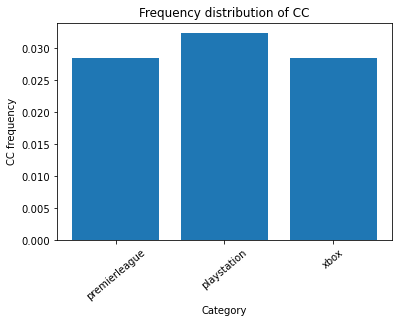

In [95]:
texts = [premierleague_text, playstation_text, xbox_text]
## visualise the frequency of CC part of speech (conjunctions) 
## across the 3 categories
plot_POS_freq(texts, 'CC', ['premierleague', 'playstation', 'xbox'])

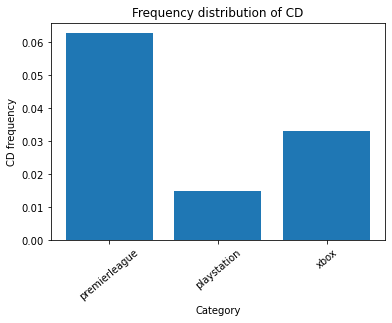

In [96]:
texts = [premierleague_text, playstation_text, xbox_text]
## visualise the frequency of CC part of speech (conjunctions) 
## across the 3 categories
plot_POS_freq(texts, 'CD', ['premierleague', 'playstation', 'xbox'])

In [97]:
#clustering
y = data.Class
print(y)

0     premierleague
1     premierleague
2     premierleague
3     premierleague
4     premierleague
          ...      
85             xbox
86             xbox
87             xbox
88             xbox
89             xbox
Name: Class, Length: 90, dtype: object


In [137]:
cosine_similarity([
    baseline_tfidf_matrix.iloc[0],
    baseline_tfidf_matrix.iloc[30],
    baseline_tfidf_matrix.iloc[60]
])

array([[1.        , 0.0083948 , 0.0202227 ],
       [0.0083948 , 1.        , 0.02358423],
       [0.0202227 , 0.02358423, 1.        ]])

In [138]:
cosine_distances([
    baseline_tfidf_matrix.iloc[0],
    baseline_tfidf_matrix.iloc[1],
    baseline_tfidf_matrix.iloc[2]
])
  

array([[0.        , 0.51762938, 0.74059582],
       [0.51762938, 0.        , 0.62998056],
       [0.74059582, 0.62998056, 0.        ]])

In [141]:
km_single =KMeans(n_clusters=3, init='random', random_state=1)
km_single.fit( baseline_tfidf_matrix )

rand_cluster_labels =km_random.labels_
print(rand_cluster_labels)
print(list(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [142]:
km_completed =KMeans(n_clusters=3, init='random', random_state=1)
km_completed.fit( baseline_tf_matrix )

rand_cluster_labels =km_random.labels_
print(rand_cluster_labels)
print(list(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [108]:
km_random =KMeans(n_clusters=3, init='random', random_state=1)
km_random.fit( baseline_count_matrix )

rand_cluster_labels =km_random.labels_
print(rand_cluster_labels)
print(list(y))

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1
 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [143]:
km_completed = KMeans(n_clusters=3, random_state=1)
km_completed.fit( baseline_tfidf_matrix )
plus_cluster_labels = km_plus.labels_
print(plus_cluster_labels)
print(list(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [113]:
km_plus = KMeans(n_clusters=3, random_state=1)
km_plus.fit( baseline_count_matrix )
plus_cluster_labels = km_plus.labels_
print(plus_cluster_labels)
print(list(y))

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [114]:
km_plus = KMeans(n_clusters=3, random_state=1)
km_plus.fit( baseline_tf_matrix )
plus_cluster_labels = km_plus.labels_
print(plus_cluster_labels)
print(list(y))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

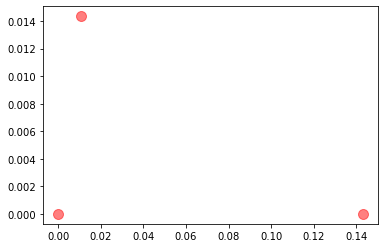

In [115]:
km_plus_centers = km_plus.cluster_centers_
plt.scatter(km_plus_centers[:,0], km_plus_centers[:, 1],
           c='red', s=100, alpha=0.5)

In [116]:
print(homogeneity_score(plus_cluster_labels, list(y)))
print(completeness_score(plus_cluster_labels, list(y)))

0.9289071107752024
0.5793801642856948


In [117]:
print(homogeneity_score(rand_cluster_labels, list(y)))
print(completeness_score(rand_cluster_labels, list(y)))

0.18868936834574213
0.05241988859942681


In [122]:
from sklearn.cluster import AgglomerativeClustering
agg_single = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')
agg_single.fit(baseline_tfidf_matrix)
agg_single.fit(baseline_tf_matrix)
agg_single.fit(baseline_count_matrix)
agg_single_labels = agg_single.labels_
print(agg_single_labels)
print(list(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [121]:
agg_complete = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
agg_complete.fit(baseline_tfidf_matrix)
agg_complete.fit(baseline_tf_matrix)
agg_complete.fit(baseline_count_matrix)
agg_complete_labels = agg_complete.labels_
print(agg_complete_labels)
print(list(y))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 2 2 2 2 2 0
 2 0 0 2 0 2 2 2 2 2 2 2 0 0 2 2]
['premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'premierleague', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'playstation', 'play

In [123]:
print(homogeneity_score(agg_single_labels, list(y)))
print(completeness_score(agg_single_labels, list(y)))

0.20119335781587197
0.022336723417234094


In [124]:
print(homogeneity_score(agg_complete_labels, list(y)))
print(completeness_score(agg_complete_labels, list(y)))

0.533360327308301
0.2785816235935532


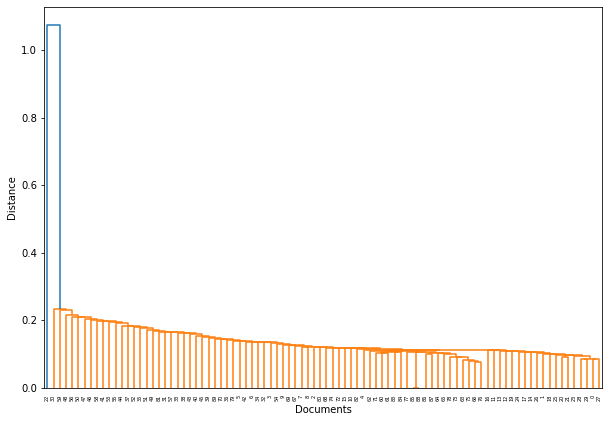

In [125]:
tm.display_dendrogram(baseline_tfidf_matrix, method='single')

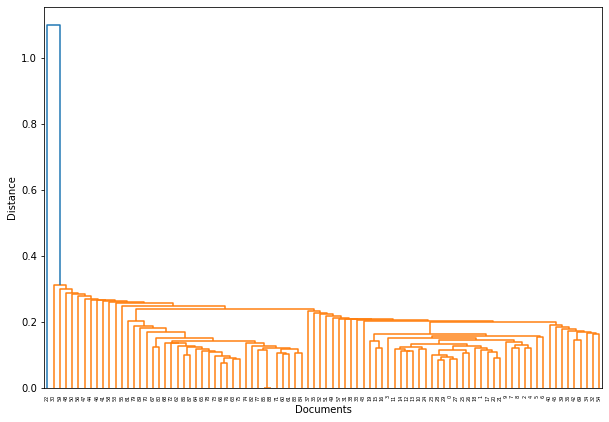

In [126]:
tm.display_dendrogram(baseline_tfidf_matrix, method='complete')

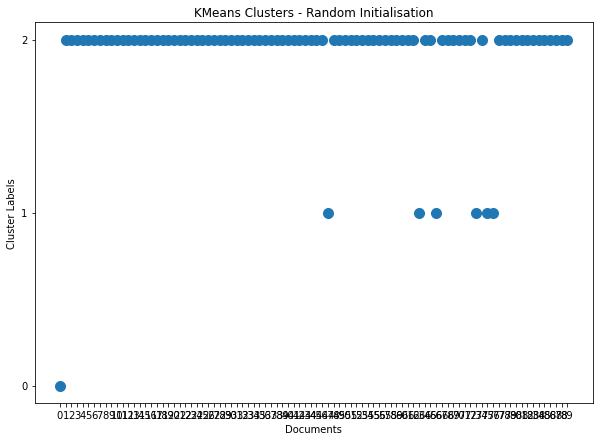

In [127]:
tm.plot_clusters(baseline_tfidf_matrix, rand_cluster_labels, 'KMeans Clusters - Random Initialisation')

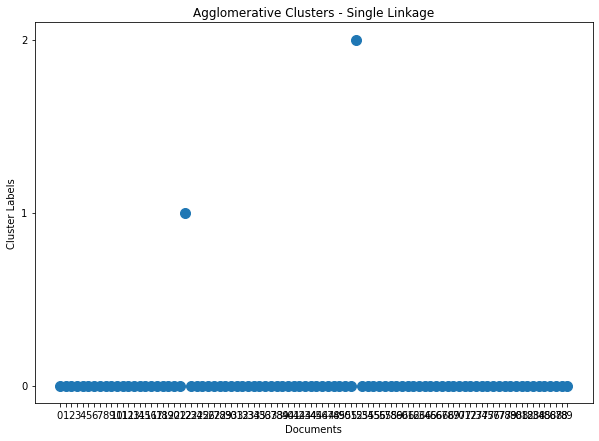

In [128]:
tm.plot_clusters(baseline_tfidf_matrix, agg_single_labels, 'Agglomerative Clusters - Single Linkage')

In [129]:
attributes = sorted(set(list(baseline_count_matrix.columns)))
print(attributes)

['!', '#', '$', '%', '&', "'", "''", "'Another", "'Big", "'Black", "'Call", "'Console", "'Cult", "'Evil", "'Exclusivity", "'Expansive", "'Fallout", "'Far", "'For", "'Gameplay", "'High", "'Immediate", "'Impossible", "'LOT", "'Little", "'Max", "'Nah", "'Next", "'Out", "'PC", "'Planet", "'Platform", "'Publishing", "'Rich", "'Shared", "'Sony", "'Soul", "'Story-Driven", "'The", "'Vault", "'Virtual", "'WHEN", "'Wall", "'Xbox", "'action", "'app/service", "'artstyle", "'average", "'balance", "'base", "'baseline", "'best", "'better", "'big", "'bonus", "'budget", "'buy", "'buying", "'characters", "'cheap", "'cloud", "'cloud-based", "'compatible", "'compromises", "'console", "'content", "'cookie", "'crazier", "'crazy", "'d", "'dedicated", "'delivery", "'demand", "'design", "'differently", "'digital", "'download", "'dried", "'emulated", "'enjoying", "'enough", "'everything", "'everywhere", "'exclusive", "'exclusives", "'external", "'fans", "'free", "'great", "'imperceptible", "'individual", "'invi

In [133]:
tm.print_n_mostFrequent("premierleague", premierleague_text, 5)
tm.print_n_mostFrequent("playstation", playstation_text, 5)
tm.print_n_mostFrequent("xbox", xbox_text, 5)

5 most frequent tokens in premierleague:  [('the', 2924), (',', 1868), ('.', 1505), ('of', 1099), ('in', 956)]
	Frequency of "the" is 0.064297651508488
	Frequency of "," is 0.04107661183921189
	Frequency of "." is 0.03309437945289823
	Frequency of "of" is 0.024166593367930336
	Frequency of "in" is 0.02102207757938253
5 most frequent tokens in playstation:  [(',', 1544), ('the', 1191), ('.', 927), ('to', 868), ('and', 754)]
	Frequency of "," is 0.05140155802649977
	Frequency of "the" is 0.03964977694919768
	Frequency of "." is 0.030860909514614822
	Frequency of "to" is 0.028896730807643652
	Frequency of "and" is 0.025101538051801053
5 most frequent tokens in xbox:  [(',', 1791), ('the', 1357), ('.', 1185), ('to', 1099), ('a', 963)]
	Frequency of "," is 0.03422641797890231
	Frequency of "the" is 0.025932579116343068
	Frequency of "." is 0.022645619935789636
	Frequency of "to" is 0.02100214034551292
	Frequency of "a" is 0.01840314936554044


In [144]:
def clean_doc(doc, replace_special=False):
 ## replace paranthetical notes with an empty string
 ##doc = re.sub(r'(\(.+?\))+', '', doc)
 ## replace references with an empty string
     doc = re.sub(r'(\[.+?\])+', '', doc)
 ## tabs, carriage returns, new lines,
     doc = re.sub(r'\s+', ' ', doc)
     if(replace_special):
 ## replace special chars with the exception of main punctuation and word chars
         doc = re.sub(r'[^\w\s\.!?:;\'\-]', ' ', doc, re.A)
 ## multiple spaces replaced with a single space
     doc = re.sub(r'\s{2,}', " ", doc)
 ## replace space before punctuation sign
     doc = re.sub(r' (?=[!\.,?:;])', "", doc)
     return doc
    
def resolve_contractions(doc, CONTR_DICT):
    for key, value, in CONTR_DICT.items():
        doc = re.sub(key, value, doc)
    return doc

In [145]:
def crossvalidate_model(clf, X, y, print_=True):
    scoring = ['accuracy', 'precision_macro', 'recall_macro']
    scores = cross_validate(dt_clf, X, y, scoring=scoring)
    if(print_):
        for key in scores.keys():
            print('%s: %0.2f, with a standard deviation: %0.2f' %(key,
                scores[key].mean(), scores[key].std()))
    return scores

## function to generate a count based matrix
def build_count_matrix(corpus):
    ## tokenise the corpus first
    tokenised_corpus = [nltk.word_tokenize(doc) for doc in corpus]
    ## a list of dictionaries aka frequency distributions
    freq_dists = []
    for doc in tokenised_corpus:
        ## for each document, generate a dictionary 
        ## of tokens as keys and respective counts as values
        token_count = {}
        for token in doc:
            ## if we already encountered this token and thus it is
            ## already in the dictionary, we increase its count by 1
            if token in token_count.keys():
                token_count[token] += 1
            ## otherwise, it is the first time it occurs, so we assign 
            ## the value of one to its count
            else: 
                token_count[token] = 1
        ## create a pd series from the dictionary generated for each doc
        ## and append it to the list
        freq_dists.append(pd.Series(token_count))
    ## once we have series for each doc, we use the list to build the 
    ## data frame and then replace the nans with 0, and return it
    matrix = pd.DataFrame(freq_dists)
    matrix = matrix.fillna(0)
    return matrix
## function to compute the lengths of the docs
def compute_doc_lengths(count_matrix):
    return count_matrix.sum(axis=1)
## function to generate a matrix with normalised frequencies
def build_tf_matrix(corpus):
    count_matrix = build_count_matrix(corpus)
    doc_lengths = compute_doc_lengths(count_matrix)
    return count_matrix.divide(doc_lengths, axis=0)
## function to compute the idfs of each term in a matrix
def compute_term_idfs(count_matrix):
    nis = count_matrix[count_matrix>0].count(axis=0)
    return np.log2(len(count_matrix)/nis)
## function to generate a matrix with tfidfs scores
def build_tfidf_matrix(docs):
    count_matrix = build_count_matrix(docs)
    doc_lengths = compute_doc_lengths(count_matrix)
    tf_matrix = count_matrix.divide(doc_lengths, axis=0)
    idfs = compute_term_idfs(count_matrix)
    tfidf_matrix = tf_matrix.multiply(idfs, axis=1)
    return tfidf_matrix.fillna(0)

##function to print the n most frequent tokens in a text
def print_n_mostFrequent(topic, text, n):
    tokens = nltk.word_tokenize(text)
    counter = Counter(tokens)
    n_freq_features = counter.most_common(n)
    print(str(n) + " most frequent tokens in " + topic + ": ", n_freq_features)
    for f in n_freq_features:
        print("\tFrequency of", '"'+ f[0] + '"', 'is', f[1]/len(tokens))
    
##function to print the common tokens from several texts
def print_common_tokens(texts):
    topics_tokens = [np.array([token for token in nltk.word_tokenize(text)])
                     for text in texts]
    intersection = topics_tokens[0]
    for n in range(1, len(topics_tokens)):
        intersection = np.intersect1d(intersection, topics_tokens[n])
    print("Number of common tokens:", len(intersection))
    print('Common Features', end=" ")
    for i in intersection:
        print(i, end=' ')
        
## function to generate the word cloud for a given topic
def generate_cloud(text):
    cloud = wordcloud.WordCloud(width=700, height=700,
                                background_color='black',
                                min_font_size=10).generate(text)
    plt.figure(figsize=(7, 7), facecolor=None)
    plt.imshow(cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
        
        

In [146]:
def clean_doc(doc, replace_special=False):
 ## replace paranthetical notes with an empty string
 ##doc = re.sub(r'(\(.+?\))+', '', doc)
 ## replace references with an empty string
     doc = re.sub(r'(\[.+?\])+', '', doc)
 ## tabs, carriage returns, new lines,
     doc = re.sub(r'\s+', ' ', doc)
     if(replace_special):
 ## replace special chars with the exception of main punctuation and word chars
         doc = re.sub(r'[^\w\s\.!?:;\'\-]', ' ', doc, re.A)
 ## multiple spaces replaced with a single space
     doc = re.sub(r'\s{2,}', " ", doc)
 ## replace space before punctuation sign
     doc = re.sub(r' (?=[!\.,?:;])', "", doc)
     return doc
    
def resolve_contractions(doc, CONTR_DICT):
    for key, value, in CONTR_DICT.items():
        doc = re.sub(key, value, doc)
    return doc


In [147]:
clean_data = data.copy()
clean_data.Article = clean_data.Article.apply(
 clean_doc)
clean_data

,Article,Class
0,Premier League The Premier League (legal name:...,premierleague
1,1992–93 FA Premier League The 1992–93 FA Premi...,premierleague
2,1993–94 FA Premier League The 1993–94 FA Premi...,premierleague
3,1994–95 FA Premier League The 1994–95 FA Premi...,premierleague
4,1995–96 FA Premier League The 1995–96 FA Premi...,premierleague
...,...,...
85,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox
86,Thymesia Review (Xbox Series X|S)GuestLogin or...,xbox
87,Roundup: Here's What The Critics Think Of Next...,xbox
88,These 8 Games Are Coming To Xbox Game Pass (Au...,xbox


In [148]:
documents = list(data.Article)
baseline_count_matrix = build_count_matrix(documents)
baseline_count_matrix

,Premier,League,The,(,legal,name,:,Football,Association,Limited,...,Adaptation,Writer,Dynamic,Background,Hazy,Included,18News,Approached,'Another,AcquisitionPopular
0,175.0,237.0,117.0,78.0,1.0,3.0,13.0,31.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.0,21.0,22.0,8.0,0.0,0.0,0.0,10.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,10.0,4.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,6.0,5.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12.0,16.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,6.0,5.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,5.0,7.0,0.0,0.0,14.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,7.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
crossvalidate_model(dt_clf, baseline_tf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.0831759 , 0.05627131, 0.05799556, 0.0589993 , 0.06809497]),
 'score_time': array([0.04986644, 0.04598355, 0.04644227, 0.05099773, 0.0460701 ]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [150]:
clean_count_matrix = build_count_matrix(list(clean_data.Article))
crossvalidate_model(dt_clf, clean_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.00
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 1.00, with a standard deviation: 0.00
test_precision_macro: 1.00, with a standard deviation: 0.00
test_recall_macro: 1.00, with a standard deviation: 0.00


{'fit_time': array([0.06100488, 0.06132722, 0.05801368, 0.06400847, 0.05669403]),
 'score_time': array([0.04600072, 0.04584384, 0.04580641, 0.04801011, 0.04793262]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([1., 1., 1., 1., 1.])}

In [151]:
clean_count_matrix.shape

(90, 12279)

In [152]:
clean_tf_matrix = build_tf_matrix(list(clean_data.Article))
crossvalidate_model(dt_clf, clean_tf_matrix, y, print_=True)

fit_time: 0.07, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.97, with a standard deviation: 0.03
test_precision_macro: 0.97, with a standard deviation: 0.02
test_recall_macro: 0.97, with a standard deviation: 0.03


{'fit_time': array([0.06202555, 0.06400013, 0.06801891, 0.09300089, 0.06399322]),
 'score_time': array([0.04897428, 0.04902482, 0.05098081, 0.04700208, 0.04992199]),
 'test_accuracy': array([0.94444444, 1.        , 0.94444444, 1.        , 0.94444444]),
 'test_precision_macro': array([0.95238095, 1.        , 0.95238095, 1.        , 0.95238095]),
 'test_recall_macro': array([0.94444444, 1.        , 0.94444444, 1.        , 0.94444444])}

In [153]:
clean_tf_matrix = build_tfidf_matrix(list(clean_data.Article))
crossvalidate_model(dt_clf, clean_tf_matrix, y, print_=True)

fit_time: 0.07, with a standard deviation: 0.00
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.97, with a standard deviation: 0.03
test_precision_macro: 0.97, with a standard deviation: 0.02
test_recall_macro: 0.97, with a standard deviation: 0.03


{'fit_time': array([0.07198572, 0.05900025, 0.06400561, 0.06700087, 0.06760335]),
 'score_time': array([0.05099511, 0.0539403 , 0.05902076, 0.05201387, 0.0570128 ]),
 'test_accuracy': array([0.94444444, 1.        , 0.94444444, 1.        , 0.94444444]),
 'test_precision_macro': array([0.95238095, 1.        , 0.95238095, 1.        , 0.95238095]),
 'test_recall_macro': array([0.94444444, 1.        , 0.94444444, 1.        , 0.94444444])}

In [154]:

repl_dictionary = {
    'premierleague': ['premier[_]?league'],
    'xbox': ['gaming'],
    'playstation': ['\bgame(s)?\b', 'player(s)?', 'platform(s)?']
   }
improved_data = clean_data.copy()
improved_data.Article = improved_data.Article.apply(
                        tm.improve_bow, replc_dict=repl_dictionary)

improved_count_matrix = tm.build_count_matrix(
              list(improved_data.Article))
tm.crossvalidate_model(dt_clf, improved_count_matrix, y, print_=True)
print("No.of terms after improving the bow:", improved_count_matrix.shape[1])


Accuracy: 0.93
Precision macro: 0.95
Recall macro: 0.93
No.of terms after improving the bow: 12269


In [156]:
universal_sw = nltk.corpus.stopwords.words('english')
print(universal_sw)

swr_u_data = improved_data.copy()
swr_u_data.Article = swr_u_data.Article.apply(tm.remove_sw, sw=universal_sw)

swr_u_count_matrix = tm.build_count_matrix(
    list(swr_u_data.Article))
swr_u_count_matrix = tm.build_tfidf_matrix(
    list(swr_u_data.Article))
swr_u_count_matrix = tm.build_tf_matrix(
    list(swr_u_data.Article))
tm.crossvalidate_model(dt_clf, swr_u_count_matrix, y, print_=True)
print("No. of terms after removing universal sw:", swr_u_count_matrix.shape[1])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
def crossvalidate_model(clf, X, y, print_=True):
    scoring = ['accuracy', 'precision_macro', 'recall_macro']
    scores = cross_validate(dt_clf, X, y, scoring=scoring)
    if(print_):
        for key in scores.keys():
            print('%s: %0.2f, with a standard deviation: %0.2f' %(key,
                scores[key].mean(), scores[key].std()))
    return scores

## function to generate a count based matrix
def build_count_matrix(corpus):
    ## tokenise the corpus first
    tokenised_corpus = [nltk.word_tokenize(doc) for doc in corpus]
    ## a list of dictionaries aka frequency distributions
    freq_dists = []
    for doc in tokenised_corpus:
        ## for each document, generate a dictionary 
        ## of tokens as keys and respective counts as values
        token_count = {}
        for token in doc:
            ## if we already encountered this token and thus it is
            ## already in the dictionary, we increase its count by 1
            if token in token_count.keys():
                token_count[token] += 1
            ## otherwise, it is the first time it occurs, so we assign 
            ## the value of one to its count
            else: 
                token_count[token] = 1
        ## create a pd series from the dictionary generated for each doc
        ## and append it to the list
        freq_dists.append(pd.Series(token_count))
    ## once we have series for each doc, we use the list to build the 
    ## data frame and then replace the nans with 0, and return it
    matrix = pd.DataFrame(freq_dists)
    matrix = matrix.fillna(0)
    return matrix
## function to compute the lengths of the docs
def compute_doc_lengths(count_matrix):
    return count_matrix.sum(axis=1)
## function to generate a matrix with normalised frequencies
def build_tf_matrix(corpus):
    count_matrix = build_count_matrix(corpus)
    doc_lengths = compute_doc_lengths(count_matrix)
    return count_matrix.divide(doc_lengths, axis=0)
## function to compute the idfs of each term in a matrix
def compute_term_idfs(count_matrix):
    nis = count_matrix[count_matrix>0].count(axis=0)
    return np.log2(len(count_matrix)/nis)
## function to generate a matrix with tfidfs scores
def build_tfidf_matrix(docs):
    count_matrix = build_count_matrix(docs)
    doc_lengths = compute_doc_lengths(count_matrix)
    tf_matrix = count_matrix.divide(doc_lengths, axis=0)
    idfs = compute_term_idfs(count_matrix)
    tfidf_matrix = tf_matrix.multiply(idfs, axis=1)
    return tfidf_matrix.fillna(0)

##function to print the n most frequent tokens in a text
def print_n_mostFrequent(topic, text, n):
    tokens = nltk.word_tokenize(text)
    counter = Counter(tokens)
    n_freq_features = counter.most_common(n)
    print(str(n) + " most frequent tokens in " + topic + ": ", n_freq_features)
    for f in n_freq_features:
        print("\tFrequency of", '"'+ f[0] + '"', 'is', f[1]/len(tokens))
    
##function to print the common tokens from several texts
def print_common_tokens(texts):
    topics_tokens = [np.array([token for token in nltk.word_tokenize(text)])
                     for text in texts]
    intersection = topics_tokens[0]
    for n in range(1, len(topics_tokens)):
        intersection = np.intersect1d(intersection, topics_tokens[n])
    print("Number of common tokens:", len(intersection))
    print('Common Features', end=" ")
    for i in intersection:
        print(i, end=' ')

In [172]:
meta_data = improved_data.copy()
meta_tfidf_matrix = tm.build_tfidf_matrix(
             list(meta_data.Article))

svm_clf = SVC(kernel ='linear', C=1, random_state=1)
meta_reduced_tfidf_matrix=tm.meta_selection(svm_clf,
                                           meta_tfidf_matrix, y)

meatareduced_tfidf_scores = tm.crossvalidate_model(
         dt_clf, meta_reduced_tfidf_matrix, y)
    
print("No.of terms after applying anova feature selection:",
     meta_reduced_tfidf_matrix.shape[1])

[('’', 0.3190539760077292), ('s', 0.19275232645617765), ('her', 0.17551184007389736), ('you', 0.16063871740273536), ('VR2', 0.1558778285841871), ('your', 0.15410402735262732), ('PlayStation', 0.14569305598646376), ('Interactive', 0.14564355028368975), ('Lead', 0.1416615847823643), ('Content', 0.14116428522935903), ('trademarks', 0.14058784852700346), ('trade', 0.13973830914126784), ('“', 0.1372830761068421), ('ll', 0.12258602309652011), ('”', 0.12136192224989754), ('SpongeBob', 0.11903256735160193), ('*', 0.11860583930703254), ('and/or', 0.11624111304403731), ('ultra-wide', 0.11460176805566405), ('Backbone', 0.1094132544325226), ('Kratos', 0.10865026102643806), ('Goat', 0.10449662931717787), ('#', 0.10394674630276987), ('Dragon', 0.09334293560200084), ('Moonrider', 0.09164969077171306), ('PS', 0.08497832875283354), ('shares', 0.08405411947578027), ('Vengeful', 0.08401221654073697), ('Guardian', 0.08401221654073697), ('our', 0.0819198058955248), ('Atreus', 0.08148769576982855), ('will',

In [174]:
rfe_data = improved_data.copy()
rfe_tfidf_matrix = tm.build_tfidf_matrix(
             list(rfe_data.Article))

rfe_reduced_tfidf_matrix=tm.rfe_selection(dt_clf,
                                           rfe_tfidf_matrix, y, n=100, step=2)

rfe_tfidf_scores = tm.crossvalidate_model(
         dt_clf, rfe_reduced_tfidf_matrix, y)
    
print("No.of terms after rfe:",
     meta_reduced_tfidf_matrix.shape[1])

[('Premier', 6086), ('Unfortunately', 6086), ('League', 6085), ('…', 6085), ('The', 6084), ('creators', 6084), ('(', 6083), ('Which', 6083), ('legal', 6082), ('isn', 6082), ('name', 6081), ('surprising', 6081), (':', 6080), ('Publishing', 6080), ('Football', 6079), ('bunch.But', 6079), ('Association', 6078), ('jiggly', 6078), ('Limited', 6077), ('Stain', 6077), (')', 6076), ('pre-udder', 6076), (',', 6075), ('Downgrade', 6075), ('is', 6074), ('remastered', 6074), ('the', 6073), ('collector', 6073), ('top', 6072), ('Coffee', 6072), ('level', 6071), ('confused', 6071), ('of', 6070), ('ANZ', 6070), ('men', 6069), ('Pilgor', 6069), ("'s", 6068), ('enthusiasts', 6068), ('English', 6067), ('Pre-order', 6067), ('football', 6066), ('toy', 6066), ('league', 6065), ('mouth', 6065), ('system', 6064), ('cuddle', 6064), ('.', 6063), ('news', 6063), ('Contested', 6062), ('pristine', 6062), ('by', 6061), ('Exciting', 6061), ('20', 6060), ('attic', 6060), ('clubs', 6059), ('someday', 6059), ('it', 605

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
crossvalidate_model(knn_clf, baseline_count_matix, y, print_=true)

NameError: name 'baseline_count_matix' is not defined

In [176]:
from sklearn.neighbors import KNeighborsClassifier
## same approach as in previous cell, but using a KNN instead of a DT
knn_clf = KNeighborsClassifier()
crossvalidate_model(knn_clf, baseline_count_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.99, with a standard deviation: 0.02
test_precision_macro: 0.99, with a standard deviation: 0.02
test_recall_macro: 0.99, with a standard deviation: 0.02


{'fit_time': array([0.08868408, 0.05699682, 0.05807805, 0.05699492, 0.0570066 ]),
 'score_time': array([0.05207491, 0.04501104, 0.04499722, 0.04700041, 0.04791474]),
 'test_accuracy': array([1.        , 1.        , 1.        , 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 1.        , 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 1.        , 0.94444444, 1.        ])}

In [177]:
from sklearn.neighbors import KNeighborsClassifier
## same approach as in previous cell, but using a KNN instead of a DT
knn_clf = KNeighborsClassifier()
crossvalidate_model(knn_clf, baseline_tfidf_matrix, y, print_=True)

fit_time: 0.06, with a standard deviation: 0.01
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.07894254, 0.06056499, 0.05799747, 0.05699563, 0.05799294]),
 'score_time': array([0.05000424, 0.04600096, 0.04708624, 0.04500341, 0.04791927]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [178]:
from sklearn.neighbors import KNeighborsClassifier
## same approach as in previous cell, but using a KNN instead of a DT
knn_clf = KNeighborsClassifier()
crossvalidate_model(knn_clf, baseline_tf_matrix, y, print_=True)

fit_time: 0.07, with a standard deviation: 0.02
score_time: 0.05, with a standard deviation: 0.00
test_accuracy: 0.98, with a standard deviation: 0.03
test_precision_macro: 0.98, with a standard deviation: 0.02
test_recall_macro: 0.98, with a standard deviation: 0.03


{'fit_time': array([0.11399674, 0.06001306, 0.05682588, 0.06009102, 0.06308389]),
 'score_time': array([0.04600072, 0.04502106, 0.04695344, 0.04800916, 0.04891992]),
 'test_accuracy': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ]),
 'test_precision_macro': array([1.        , 1.        , 0.95238095, 0.95238095, 1.        ]),
 'test_recall_macro': array([1.        , 1.        , 0.94444444, 0.94444444, 1.        ])}

In [180]:
tm.search_optimal_params(dt_clf, rfe_reduced_tfidf_matrix,
                        y, params)


NameError: name 'params' is not defined

In [186]:
params = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(3, 16),
    "min_samples_split": range(2, 16),
    "min_samples_leaf": range(3,10),
    "min_impurity_decrease": [0.01,0.02,0.03,0.04,0.05]
}
tm.search_optimal_params(dt_clf, rfe_reduced_tfidf_matrix, y, params)
tm.search_optimal_params(dt_clf, rfe_reduced_tfidf_matrix, y, params)

({'criterion': 'gini',
  'max_depth': 3,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 3,
  'min_samples_split': 2},
 0.9777777777777779)

In [187]:
tm.search_optimal_params(dt_clf, rfe_reduced_tfidf_matrix,
                        y, params)


({'criterion': 'gini',
  'max_depth': 3,
  'min_impurity_decrease': 0.01,
  'min_samples_leaf': 3,
  'min_samples_split': 2},
 0.9777777777777779)

In [189]:
opt_tfidf_clf = DecisionTreeClassifier(random_state=1,
                                      criterion='gini',max_depth=3,
                                       min_impurity_decrease=0.01,
                                       min_samples_leaf=3,
                                       min_samples_split=2)
opt_tfidf_scores=tm.crossvalidate_model(opt_tfidf_clf,
                                       rfe_reduced_tfidf_matrix, y)

Accuracy: 0.98
Precision macro: 0.98
Recall macro: 0.98
